In [ ]:
# first neural network with keras tutorial
#from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import image
from matplotlib import pyplot
import os
import shutil
import numpy as np
from PIL import Image
import pickle

In [ ]:
# load the train dataset
X_trainUnflat = pickle.load(open("train_X.p", 'rb'))
y_trainUnflat = pickle.load(open("train_Y.p", 'rb'))

print(X_trainUnflat.shape)
print(y_trainUnflat.shape)

X_train = X_trainUnflat.reshape(X_trainUnflat.shape[0],-1)
y_train = y_trainUnflat.reshape(y_trainUnflat.shape[0],-1)

print(X_train.shape)
print(y_train.shape)

# load the dev dataset
X_devUnflat = pickle.load(open("dev_X.p", 'rb'))
y_devUnflat = pickle.load(open("dev_Y.p", 'rb'))

print(X_devUnflat.shape)
print(y_devUnflat.shape)

X_dev = X_devUnflat.reshape(X_devUnflat.shape[0],-1)
y_dev = y_devUnflat.reshape(y_devUnflat.shape[0],-1)

print(X_dev.shape)
print(y_dev.shape)

# load the test dataset
X_testUnflat = pickle.load(open("test_X.p", 'rb'))
y_testUnflat = pickle.load(open("test_Y.p", 'rb'))

print(X_testUnflat.shape)
print(y_testUnflat.shape)

X_test = X_testUnflat.reshape(X_testUnflat.shape[0],-1)
y_test = y_testUnflat.reshape(y_testUnflat.shape[0],-1)

print(X_test.shape)
print(y_test.shape)

numDims = X_train.shape[1]
numExamples = X_train.shape[0]
# the number of neurons was selected somewhat arbitrarily
# on the basis of what would run in Google Collab
neurons1 = int(numDims/240)
neurons2 = int(numDims/480)
neurons3 = int(numDims/960)
neurons4 = int(numDims/1920)
neurons5 = int(numDims/3840)
neurons6 = int(numDims/7680)

(433, 208, 160, 3)
(433,)
(433, 99840)
(433, 1)
(93, 208, 160, 3)
(93,)
(93, 99840)
(93, 1)
(93, 208, 160, 3)
(93,)
(93, 99840)
(93, 1)
416
208
104
52
26
13


In [ ]:
#HYPERPARAMETER SEARCH OVER EPOCH NUMBER and BATCH SIZE
#We keep number of layers, neuron per layer, activation in each layer constant, batch size of 10 100? full?
batchSizes = [5,10,50,100,numExamples]
#batchSize = numExamples #100 #10
#numEpochsToTest = [i for i in range(5,31)]
#numEpochsToTest = [i for i in range(10,20)]

#print(numEpochsToTest)
print(batchSizes)


[5, 10, 50, 100, 433]


In [ ]:
trainAccuracy = []
valAccuracy = []
trainLoss = []
valLoss = []

for batchSize in batchSizes:
  print("BatchSize : ", batchSize)
  model = Sequential()
  model.add(Dense(neurons1, input_dim=numDims, activation='relu'))
  model.add(Dense(neurons2, activation='relu'))
  model.add(Dense(neurons3, activation='relu'))
  model.add(Dense(neurons4, activation='relu'))
  model.add(Dense(neurons5, activation='relu'))
  model.add(Dense(neurons6, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=31, batch_size=batchSize, validation_data = (X_dev, y_dev))
  historyDict = history.history
  trainAccuracy.append(historyDict["accuracy"])
  valAccuracy.append(historyDict["val_accuracy"])
  trainLoss.append(historyDict['loss'])
  valLoss.append(historyDict['val_loss'])
  

  

BatchSize :  5
Epoch 1/31
87/87 [==============================] - 5s 22ms/step - loss: 133.1489 - accuracy: 0.5335 - val_loss: 54.4473 - val_accuracy: 0.5269
Epoch 2/31
87/87 [==============================] - 2s 19ms/step - loss: 32.4930 - accuracy: 0.5820 - val_loss: 5.1272 - val_accuracy: 0.5806
Epoch 3/31
87/87 [==============================] - 2s 20ms/step - loss: 17.8348 - accuracy: 0.5774 - val_loss: 19.4143 - val_accuracy: 0.4731
Epoch 4/31
87/87 [==============================] - 2s 20ms/step - loss: 12.3182 - accuracy: 0.6259 - val_loss: 10.1294 - val_accuracy: 0.5161
Epoch 5/31
87/87 [==============================] - 2s 20ms/step - loss: 4.2554 - accuracy: 0.6767 - val_loss: 8.1321 - val_accuracy: 0.5269
Epoch 6/31
87/87 [==============================] - 2s 19ms/step - loss: 2.3345 - accuracy: 0.7644 - val_loss: 2.5687 - val_accuracy: 0.5699
Epoch 7/31
87/87 [==============================] - 2s 19ms/step - loss: 1.6483 - accuracy: 0.7413 - val_loss: 4.3309 - val_accurac

In [ ]:
#print(trainAccuracy)
print(len(trainAccuracy))
for i in trainAccuracy:
  print(i)
  print(len(i))


5
[0.5334873199462891, 0.581986129283905, 0.5773671865463257, 0.6258660554885864, 0.6766743659973145, 0.7644341588020325, 0.7413395047187805, 0.8290992975234985, 0.7575057744979858, 0.8660507798194885, 0.6882216930389404, 0.6905311942100525, 0.7829099297523499, 0.8729792237281799, 0.8244803547859192, 0.8706697225570679, 0.9515011310577393, 0.9538106322288513, 0.9584295749664307, 0.8545034527778625, 0.8314087986946106, 0.8498845100402832, 0.9307159185409546, 0.9815242290496826, 0.9976905584335327, 0.9907621145248413, 1.0, 1.0, 1.0, 1.0, 1.0]
31
[0.505773663520813, 0.5288683772087097, 0.570438802242279, 0.6743649244308472, 0.7367205619812012, 0.6905311942100525, 0.6281754970550537, 0.6212471127510071, 0.7113164067268372, 0.7505773901939392, 0.7482678890228271, 0.6928406357765198, 0.7575057744979858, 0.886836051940918, 0.9145496487617493, 0.898383378982544, 0.9260969758033752, 0.9515011310577393, 0.9030023217201233, 0.9422633051872253, 0.974595844745636, 0.9191685914993286, 0.836027741432

In [ ]:
print(len(valAccuracy))

for i in valAccuracy:
  print(i)
  print(len(i))

5
[0.5268816947937012, 0.5806451439857483, 0.47311827540397644, 0.5161290168762207, 0.5268816947937012, 0.5698924660682678, 0.5698924660682678, 0.5698924660682678, 0.5913978219032288, 0.5161290168762207, 0.5161290168762207, 0.47311827540397644, 0.5698924660682678, 0.602150559425354, 0.5913978219032288, 0.6236559152603149, 0.602150559425354, 0.5806451439857483, 0.5913978219032288, 0.5806451439857483, 0.5698924660682678, 0.5806451439857483, 0.602150559425354, 0.602150559425354, 0.602150559425354, 0.602150559425354, 0.6344085931777954, 0.602150559425354, 0.6236559152603149, 0.6344085931777954, 0.6344085931777954]
31
[0.5268816947937012, 0.49462366104125977, 0.5483871102333069, 0.5806451439857483, 0.5483871102333069, 0.602150559425354, 0.5698924660682678, 0.5268816947937012, 0.5806451439857483, 0.6451612710952759, 0.6451612710952759, 0.6451612710952759, 0.602150559425354, 0.6129032373428345, 0.6236559152603149, 0.6236559152603149, 0.5913978219032288, 0.5698924660682678, 0.6236559152603149,

In [ ]:
print(len(trainLoss))
for i in trainLoss:
  print(i)
  print(len(i))


5
[133.14889526367188, 32.492984771728516, 17.834794998168945, 12.31817626953125, 4.255373954772949, 2.3344955444335938, 1.6483259201049805, 0.8106924891471863, 1.5239659547805786, 0.5703993439674377, 4.302464485168457, 6.779447078704834, 3.0515072345733643, 0.45208990573883057, 1.0070643424987793, 0.545854926109314, 0.1404714733362198, 0.09554504603147507, 0.10588348656892776, 0.6431857943534851, 0.8787360191345215, 0.8295376896858215, 0.14948274195194244, 0.04035128280520439, 0.013125834986567497, 0.024852072820067406, 0.013819180428981781, 0.005501460749655962, 0.007608422543853521, 0.003206602530553937, 0.004326351452618837]
31
[250.97128295898438, 61.51240158081055, 28.56508445739746, 13.984589576721191, 6.835634708404541, 8.335193634033203, 12.857036590576172, 14.893692016601562, 6.834973335266113, 4.034110069274902, 4.287024021148682, 9.912691116333008, 3.109405279159546, 0.9249682426452637, 0.5451346039772034, 0.5759608745574951, 0.41097506880760193, 0.17835195362567902, 0.6677

In [ ]:
print(len(valLoss))
for i in valLoss:
  print(i)
  print(len(i))

5
[54.447303771972656, 5.1272478103637695, 19.414278030395508, 10.129436492919922, 8.132146835327148, 2.5687191486358643, 4.330874443054199, 3.9989089965820312, 2.799992322921753, 2.8972575664520264, 8.95063304901123, 10.2713041305542, 2.435197114944458, 2.0253708362579346, 2.3921306133270264, 2.0742127895355225, 2.0045385360717773, 2.3614137172698975, 2.4028518199920654, 2.329037666320801, 3.222482919692993, 2.1784470081329346, 2.184755802154541, 2.07786226272583, 2.085207939147949, 2.502678632736206, 2.224273920059204, 2.396399736404419, 2.3600947856903076, 2.3732876777648926, 2.4508399963378906]
31
[146.1590576171875, 55.46356964111328, 18.573118209838867, 7.352574348449707, 6.212301254272461, 5.519617080688477, 12.626618385314941, 18.551982879638672, 6.4105939865112305, 5.611973285675049, 5.372118949890137, 5.346546173095703, 6.416251182556152, 6.192272663116455, 3.606205463409424, 4.915322780609131, 3.668768882751465, 4.400861740112305, 3.4590303897857666, 4.709696292877197, 7.709

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


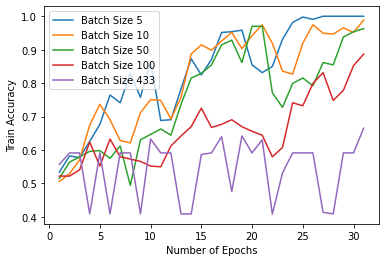

In [ ]:
#For Accuracy Plotting

x = [i for i in range(1,32)]
print(x)
yTrainAcc = trainAccuracy
#Train Accuracies
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yTrainAcc[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Train Accuracy")
pyplot.show()




[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


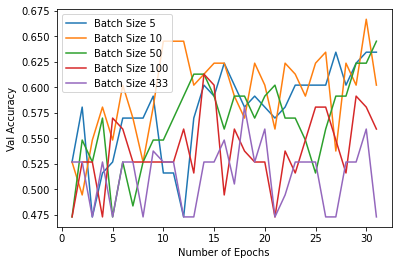

In [ ]:
#For Accuracy Plotting

x = [i for i in range(1,32)]
print(x)
yValAcc = valAccuracy
#Val Accuracies
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValAcc[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Val Accuracy")
pyplot.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


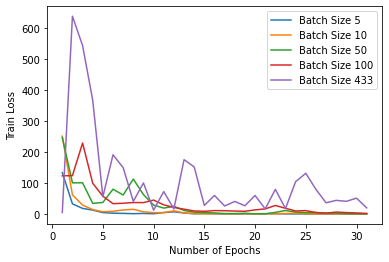

In [ ]:
#For Loss Plotting

x = [i for i in range(1,32)]
print(x)
yTrainLoss = trainLoss
#Train Accuracies
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yTrainLoss[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Train Loss")
pyplot.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


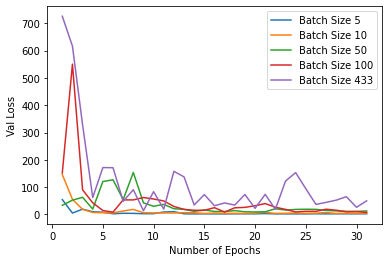

In [ ]:
#For Loss Plotting

x = [i for i in range(1,32)]
print(x)
yValLoss = valLoss
#Train Accuracies
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValLoss[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Val Loss")
pyplot.show()

In [ ]:
val10Loss = valLoss[1]
val10Accuracy = valAccuracy[1]

print(val10Accuracy)
print(max(val10Accuracy))
print(val10Accuracy.index(max(val10Accuracy)))

[0.5268816947937012, 0.49462366104125977, 0.5483871102333069, 0.5806451439857483, 0.5483871102333069, 0.602150559425354, 0.5698924660682678, 0.5268816947937012, 0.5806451439857483, 0.6451612710952759, 0.6451612710952759, 0.6451612710952759, 0.602150559425354, 0.6129032373428345, 0.6236559152603149, 0.6236559152603149, 0.5913978219032288, 0.5698924660682678, 0.6236559152603149, 0.602150559425354, 0.5591397881507874, 0.6236559152603149, 0.6129032373428345, 0.5913978219032288, 0.6236559152603149, 0.6344085931777954, 0.5376344323158264, 0.6236559152603149, 0.602150559425354, 0.6666666865348816, 0.602150559425354]
0.6666666865348816
29


In [ ]:
bestEpoch = 29
bestBatchSize = 10
bestmodel = Sequential()
bestmodel.add(Dense(neurons1, input_dim=numDims, activation='relu'))
bestmodel.add(Dense(neurons2, activation='relu'))
bestmodel.add(Dense(neurons3, activation='relu'))
bestmodel.add(Dense(neurons4, activation='relu'))
bestmodel.add(Dense(neurons5, activation='relu'))
bestmodel.add(Dense(neurons6, activation='relu'))
bestmodel.add(Dense(1, activation='sigmoid'))
# compile the keras model
bestmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bestmodel.fit(X_train, y_train, epochs=bestEpoch, batch_size=bestBatchSize, validation_data = (X_dev, y_dev))

# evaluate the keras model on test data
_, accuracy = bestmodel.evaluate(X_test, y_test)
print('Test Accuracy: %.2f' % (accuracy*100))

Epoch 1/29
44/44 [==============================] - 2s 29ms/step - loss: 441.7253 - accuracy: 0.5289 - val_loss: 47.0359 - val_accuracy: 0.5591
Epoch 2/29
44/44 [==============================] - 1s 22ms/step - loss: 99.6930 - accuracy: 0.5289 - val_loss: 32.4970 - val_accuracy: 0.5591
Epoch 3/29
44/44 [==============================] - 1s 23ms/step - loss: 44.4843 - accuracy: 0.5566 - val_loss: 19.7613 - val_accuracy: 0.5806
Epoch 4/29
44/44 [==============================] - 1s 23ms/step - loss: 36.2210 - accuracy: 0.6166 - val_loss: 56.3245 - val_accuracy: 0.4731
Epoch 5/29
44/44 [==============================] - 1s 23ms/step - loss: 28.9732 - accuracy: 0.6259 - val_loss: 32.7035 - val_accuracy: 0.5806
Epoch 6/29
44/44 [==============================] - 1s 23ms/step - loss: 13.2275 - accuracy: 0.6975 - val_loss: 44.4057 - val_accuracy: 0.5269
Epoch 7/29
44/44 [==============================] - 1s 23ms/step - loss: 10.7757 - accuracy: 0.7344 - val_loss: 14.2664 - val_accuracy: 0.612